In [11]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Masters/Semester 2/JOURNAL/BDA/Input Dataset/Social_Network_Ads -DT,NB,SVM.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [15]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
# First we look at target variable porportions
pd.crosstab(df['Purchased'], df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


In [17]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
# drop not used columns
df.drop('User ID', axis=1, inplace=True)

In [19]:
# Dealing with categorical variables:
df['Gender']=np.where(df['Gender']=='Male',1,0)

In [20]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [21]:
# Rearange column order
df = df[['Purchased', 'Age', 'EstimatedSalary', 'Gender']]

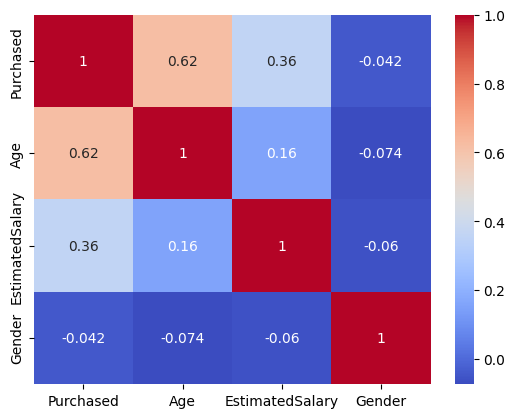

In [22]:
# useing heatmap to see the correlation between our features
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [23]:
# Defining the variables and splitting the data

y = df['Purchased'] # dependent features
X = df.drop('Purchased', axis=1) # independent features

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
X_train.shape, X_test.shape

((280, 3), (120, 3))

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)


In [26]:
# Fitting SVM to the Training set
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [27]:
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)
print(train_score)
print(test_score)

0.9035714285714286
0.9333333333333333


In [28]:
#Predicting the Train and Test set results

y_train_pred =svm.predict(X_train)
y_test_pred = svm.predict(X_test)
y_test_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)


0.9035714285714286


array([[167,  17],
       [ 10,  86]])

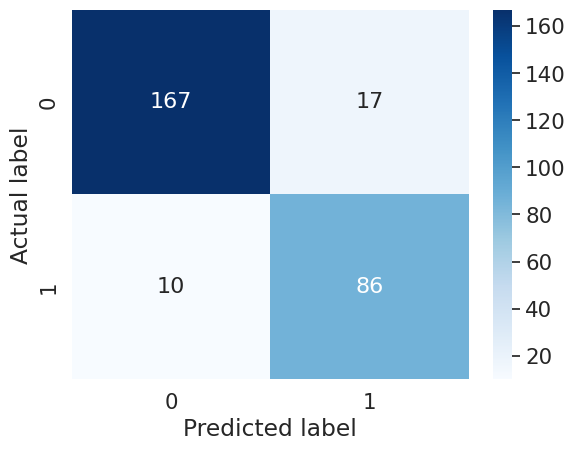

In [31]:
cm1 = confusion_matrix(y_train, y_train_pred)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size":16}, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
print("classification report -\n", classification_report(y_train, y_train_pred))

classification report -
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       184
           1       0.83      0.90      0.86        96

    accuracy                           0.90       280
   macro avg       0.89      0.90      0.89       280
weighted avg       0.91      0.90      0.90       280



In [33]:
# Plot the training data
plt.scatter(X_train['Age'], X_train['EstimatedSalary'], c=y_train)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training Data')
plt.show()

IndexError: ignored

In [ ]:
from mlxtend.plotting import plot_decision_regions
!pip install mlxtend --upgrade --no-deps

plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM Decision Regions')
plt.show()